In [1]:
import numpy as np
import time
import os
import sys
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import bigbadbrain as bbb

%matplotlib inline
plt.rcParams.update({'font.size': 26})

In [2]:
root_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset'

In [3]:
flies = [85,86,87,88,89,90,92,93,94,95,96,97,98,99,100,101,103,104,105,106,107,109,110,111]
flies = [str(x).zfill(3) for x in flies]
len(flies)

24

In [4]:
fictracs = {}
for fly in flies:
    fictrac_path = os.path.join(root_path, 'fly_{}'.format(fly), 'func_0', 'fictrac')
    fictracs[fly] = bbb.load_fictrac(fictrac_path)


~~ load_fictrac ~~
load_fictrac done. Duration: 3.10 sec

~~ load_fictrac ~~
load_fictrac done. Duration: 3.27 sec

~~ load_fictrac ~~
load_fictrac done. Duration: 3.19 sec

~~ load_fictrac ~~
load_fictrac done. Duration: 3.26 sec

~~ load_fictrac ~~
load_fictrac done. Duration: 3.27 sec

~~ load_fictrac ~~
load_fictrac done. Duration: 3.20 sec

~~ load_fictrac ~~
load_fictrac done. Duration: 3.24 sec

~~ load_fictrac ~~
load_fictrac done. Duration: 3.16 sec

~~ load_fictrac ~~
load_fictrac done. Duration: 3.17 sec

~~ load_fictrac ~~
load_fictrac done. Duration: 3.22 sec

~~ load_fictrac ~~
load_fictrac done. Duration: 3.20 sec

~~ load_fictrac ~~
load_fictrac done. Duration: 3.18 sec

~~ load_fictrac ~~
load_fictrac done. Duration: 3.25 sec

~~ load_fictrac ~~
load_fictrac done. Duration: 3.25 sec

~~ load_fictrac ~~
load_fictrac done. Duration: 3.22 sec

~~ load_fictrac ~~
load_fictrac done. Duration: 3.23 sec

~~ load_fictrac ~~
load_fictrac done. Duration: 3.17 sec

~~ load_fictr

In [47]:
bad_flies = ['085','088','090','092','093','096','097','103','104','105','106','107','109','111']

In [48]:
good_flies = ['086','087','089','094','095','098','099','100','101','110']

In [5]:
final_flies = ['087', '089', '094', '097', '098', '099', '100', '101', '105']

In [11]:
plt.rcParams.update({'font.size': 20})

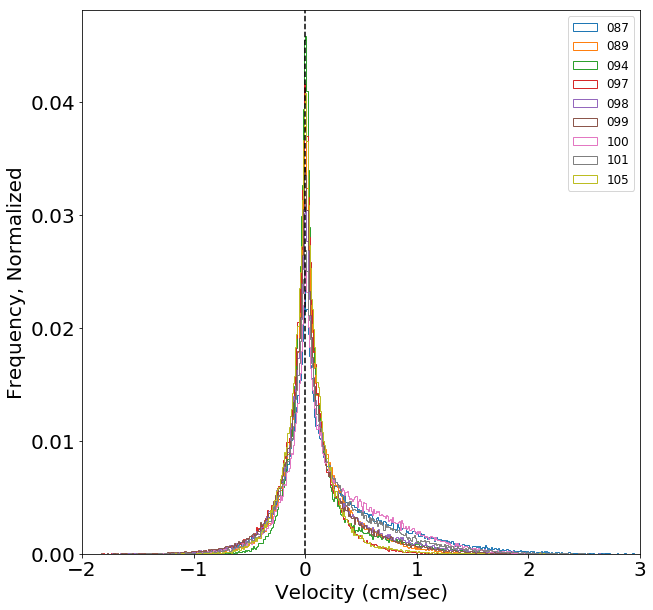

In [13]:
########################################
### Plot Forward Velocity Histograms ###
########################################

bins = np.ndarray.tolist(np.arange(-2,3,.01))
plt.figure(figsize=(10,10))
behavior = 'dRotLabY'
sphere_radius = 4.5e-3
binned_data = []

for fly in final_flies:
    vector = fictracs[fly][behavior]*sphere_radius # now in m per 20ms
    vector = vector * 100 * 50 # multiply by Hz and cm/meter # now in cm per sec
    weights = np.ones_like(vector)/float(len(vector))
    binned,_,_=plt.hist(vector,bins,weights=weights,label=fly,stacked=True,histtype='step')
    binned_data.append(binned)

plt.axvline(0,linestyle='--',color='k')
plt.legend(fontsize=12)
plt.xlim(-2,3)
plt.xlabel("Velocity (cm/sec)")
plt.ylabel("Frequency, Normalized")
#plt.title("20200817 -- Brezovec Whole Brain Imaging Forward Velocity Histograms; Good Flies", fontsize=12)

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, timestr)
plt.savefig(fname,dpi=300,bbox_inches='tight')

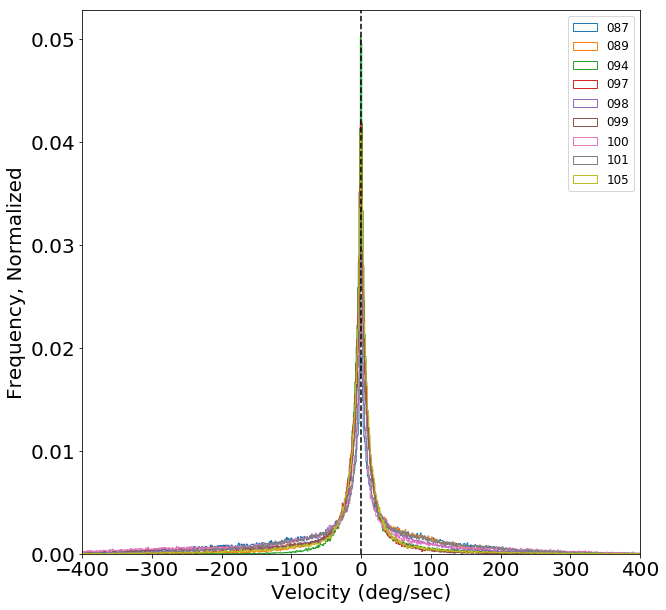

In [14]:
########################################
### Plot Angular Velocity Histograms ###
########################################

bins = np.ndarray.tolist(np.arange(-400,400,1))
fig = plt.figure(figsize=(10,10))
behavior = 'dRotLabZ'
sphere_radius = 4.5e-3 #3.175e-3 #
binned_data = []
for fly in final_flies:
    vector = np.rad2deg(fictracs[fly][behavior]) # now in deg per 20ms
    vector = vector * 50 # now in deg per sec
    weights = np.ones_like(vector)/float(len(vector))
    binned,throwaway,throwaway2=plt.hist(vector,bins,weights=weights,label=fly,stacked=True,histtype='step')
    binned_data.append(binned)
    
plt.axvline(0,linestyle='--',color='k')
plt.legend(fontsize=12)
plt.xlim(-400,400)
plt.xlabel("Velocity (deg/sec)")
plt.ylabel("Frequency, Normalized")
#plt.title("20200817 -- Brezovec Whole Brain Imaging Rotation Velocity Histograms; Good Flies", fontsize=12)

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, timestr)
plt.savefig(fname,dpi=300,bbox_inches='tight')

### BIGRIG Data comparison

In [15]:
#####################
###  Define Data  ###
#####################

Path = '/oak/stanford/groups/trc/data/Brezovec/VRArena/exps'
#Path = '/scratch/users/brezovec/exps'

Expts = ['exp-20181102-165424',
         'exp-20181102-175232',
         'exp-20181103-184106',
         'exp-20181104-162518',
         'exp-20181105-115608',
         'exp-20181107-181316',
         'exp-20181108-111101',
         'exp-20181108-143044',
         'exp-20181109-084314']

#Expts = ['exp-20181031-190938']

In [16]:
###########################
###  Define Trial Class ###
###########################

class Trial:
    def __init__ (self, dirName):
        print('Importing from: {}'.format(Path))
        self.cam = Cam(os.path.join(dirName, 'cam.txt'))
        self.cnc = Cnc(os.path.join(dirName, 'cnc.txt'))
        self.stimuli = Stimuli(os.path.join(dirName, 'stimuli.txt'), mode='static_stim')
        
class Cam:
    def __init__ (self, fname):
        print(fname)
        self.tvec = np.genfromtxt(fname, delimiter=',',skip_header=1,usecols=(0,))
        self.xvec = np.genfromtxt(fname, delimiter=',',skip_header=1,usecols=(2,))
        self.yvec = np.genfromtxt(fname, delimiter=',',skip_header=1,usecols=(3,))
        self.pvec = np.genfromtxt(fname, delimiter=',',skip_header=1,usecols=(1,), dtype=bool)
        self.avec = np.genfromtxt(fname, delimiter=',',skip_header=1,usecols=(6,))

class Cnc:
    def __init__ (self, fname):
        print(fname)
        self.tvec = np.genfromtxt(fname, delimiter=',',skip_header=1,usecols=(0,))
        self.xvec = np.genfromtxt(fname, delimiter=',',skip_header=1,usecols=(1,))
        self.yvec = np.genfromtxt(fname, delimiter=',',skip_header=1,usecols=(2,))

class Stimuli:
    def __init__ (self, fname, mode):
        print(fname)
        
        if mode == 'static_stim':
            self.dict = stim_parser(fname)
            
        elif mode == 'moving_stim':
            with open(fname) as file:  
                data = file.read() 
            d=data.split('@')
            newStimTimes = [item for item in d if 'NewStim' in item]
            updateStimTimes = [item for item in d if 'UpdateStim' in item]
            StimTimesMessy = newStimTimes + updateStimTimes
            StimTimes = [float(item.split(' ')[0]) for item in StimTimesMessy]
            self.stimtimes = StimTimes

            ratesMessy = [item.split('\n') for item in StimTimesMessy]
            rates_nice = [item for sublist in ratesMessy for item in sublist]
            rates_only = [item for item in rates_nice if 'rate' in item]
            rates = [int(item.split(' ')[3]) for item in rates_only]
            self.rates = rates
            
        else:
            assert('invalid stimuli mode')
        
## For importing files in correct order:
def tryint(s):
    try:
        return int(s)
    except:
        return s

def alphanum_key(s):
    return [tryint(c) for c in re.split('([0-9]+)', s)]

def sort_nicely(x):
    x.sort(key=alphanum_key)
    
def stim_parser(fname):
    with open(fname) as file:  
        data = file.read() 
    d = data.split('\n')
    kv_pair = [item for item in d if ':' in item and '@' not in item]
    stim_dict = {}
    for item in kv_pair:
        key = item.split(':')[0]
        value = item.split(':')[1]
        key = re.sub(" |'|\"|,", "", key)
        value = re.sub(" |'|\"|,", "", value)
        stim_dict[key] = value
    return stim_dict

In [17]:
import re
from scipy.ndimage.interpolation import shift
from scipy.interpolate import interp1d

In [18]:
#####################
###  Import Data  ###
#####################

trials = []        
for expt in Expts:
    dirNames = os.listdir(os.path.join(Path, expt))
    dirNames = [x for x in dirNames if 'trial' in x]
    sort_nicely(dirNames)
    trials.append(([Trial(os.path.join(Path, expt, dirName)) for dirName in dirNames]))
trials = [item for sublist in trials for item in sublist]

Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-165424/trial-1-20181102-170040/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-165424/trial-1-20181102-170040/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-165424/trial-1-20181102-170040/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-165424/trial-2-20181102-170055/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-165424/trial-2-20181102-170055/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-165424/trial-2-20181102-170055/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-165424/trial-3-20181102-170301/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-2018

/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-175232/trial-14-20181102-192609/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-175232/trial-14-20181102-192609/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-175232/trial-15-20181102-192931/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-175232/trial-15-20181102-192931/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-175232/trial-15-20181102-192931/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-175232/trial-16-20181102-193118/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-175232/trial-16-20181102-193118/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181102-175232/trial-16-20181102-193118/stimuli.txt
Importing fr

/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181103-184106/trial-15-20181103-194919/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181103-184106/trial-16-20181103-213635/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181103-184106/trial-16-20181103-213635/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181103-184106/trial-16-20181103-213635/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181103-184106/trial-17-20181103-223722/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181103-184106/trial-17-20181103-223722/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181103-184106/trial-17-20181103-223722/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/ex

/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181105-115608/trial-9-20181105-130753/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181105-115608/trial-9-20181105-130753/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181105-115608/trial-10-20181105-131242/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181105-115608/trial-10-20181105-131242/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181105-115608/trial-10-20181105-131242/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181105-115608/trial-11-20181105-131734/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181105-115608/trial-11-20181105-131734/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181105-115608/trial-11-20181105-131734/stimuli.txt
Importing from

/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181105-115608/trial-31-20181105-152448/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181105-115608/trial-31-20181105-152448/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181107-181316/trial-1-20181107-181948/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181107-181316/trial-1-20181107-181948/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181107-181316/trial-1-20181107-181948/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181107-181316/trial-2-20181107-182044/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181107-181316/trial-2-20181107-182044/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181107-181316/trial-2-20181107-182044/stimuli.txt
Importing from: /o

/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181107-181316/trial-21-20181107-191239/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181107-181316/trial-22-20181107-191545/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181107-181316/trial-22-20181107-191545/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181107-181316/trial-22-20181107-191545/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181107-181316/trial-23-20181107-192031/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181107-181316/trial-23-20181107-192031/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181107-181316/trial-23-20181107-192031/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/ex

/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-111101/trial-19-20181108-120822/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-111101/trial-19-20181108-120822/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-111101/trial-20-20181108-121054/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-111101/trial-20-20181108-121054/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-111101/trial-20-20181108-121054/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-111101/trial-21-20181108-121508/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-111101/trial-21-20181108-121508/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-111101/trial-21-20181108-121508/stimuli.txt
Importing fr

/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-143044/trial-13-20181108-154720/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-143044/trial-14-20181108-154747/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-143044/trial-14-20181108-154747/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-143044/trial-14-20181108-154747/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-143044/trial-15-20181108-154904/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-143044/trial-15-20181108-154904/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181108-143044/trial-15-20181108-154904/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/ex

/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181109-084314/trial-4-20181109-090724/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181109-084314/trial-4-20181109-090724/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181109-084314/trial-5-20181109-090820/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181109-084314/trial-5-20181109-090820/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181109-084314/trial-5-20181109-090820/stimuli.txt
Importing from: /oak/stanford/groups/trc/data/Brezovec/VRArena/exps
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181109-084314/trial-6-20181109-091659/cam.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181109-084314/trial-6-20181109-091659/cnc.txt
/oak/stanford/groups/trc/data/Brezovec/VRArena/exps/exp-20181109-084314/trial-6-20181109-091659/stimuli.txt
Importing from: /oak

In [19]:
########################
### Define Fly Class ###
########################

class Fly:
    def __init__ (self,trial,time_res=0.01,sigma=0):
        mode = 'static_stim'
        if np.any(trial.cam.pvec):
            # Get cam data (only time points where pvec is true, aka fly is present)
            camt = trial.cam.tvec[trial.cam.pvec]
            #Interpolate
            cama = interp1d(camt, trial.cam.avec[trial.cam.pvec],kind='nearest')
            camx = interp1d(camt, trial.cam.xvec[trial.cam.pvec])
            camy = interp1d(camt, trial.cam.yvec[trial.cam.pvec])
            # Get cnc data
            cncx = interp1d(trial.cnc.tvec, trial.cnc.xvec)
            cncy = interp1d(trial.cnc.tvec, trial.cnc.yvec)
            tmin = max(camt[0], trial.cnc.tvec[0])
            tmax = min(camt[-1], trial.cnc.tvec[-1])
            # Pull from interpolated data at chosen time resolution, and add camera and cnc positions
            self.t = np.arange(tmin, tmax, time_res)
            self.x = camx(self.t) + cncx(self.t)
            self.y = camy(self.t) + cncy(self.t)
            self.a = cama(self.t)
            # Unwrap angles and rotate
            self.angleUnwrapper()
            #self.a=angleChangeOrigin(self.a)
            self.a = 90-self.a #rotate angles 90deg to change ellipse fitting defined angles
            self.a = -self.a #flip angle horizontally due to camera flip
            # Smooth if asked to
            if sigma is not 0:
                self.x = scipy.ndimage.filters.gaussian_filter1d(self.x,sigma)
                self.y = scipy.ndimage.filters.gaussian_filter1d(self.y,sigma)
                self.a = scipy.ndimage.filters.gaussian_filter1d(self.a,sigma)
            self.tvid = self.t - camt[0] #for video debugging
            self.velocity()
            x_covered = np.sum(np.abs(np.diff(self.x)))
            y_covered = np.sum(np.abs(np.diff(self.y)))
            self.dist_covered = x_covered + y_covered
            self.duration = self.t[-1]-self.t[0]
            self.a_covered = np.sum(np.abs(np.diff(self.a)))
            
            if mode == 'static_stim':
                self.stimdict = trial.stimuli.dict

            elif mode == 'moving_stim':
                self.stimtimes = trial.stimuli.stimtimes
                self.rates = trial.stimuli.rates
            
        else:
            self.t = None
            self.x = None
            self.y = None
            self.a = None
            self.v = None
            self.tvid = None
    def angleUnwrapper(self):
        jumpThresh=150
        angles=[]
        angle_offset=0
        for k, angle in enumerate(self.a):
            if k == 0:
                angles.append(angle)
                continue
            angle += angle_offset
            if angles[-1]-angle > jumpThresh:
                angle_offset += 180
                angle += 180
            elif angle-angles[-1] > jumpThresh:
                angle_offset -= 180
                angle -= 180
            angles.append(angle)
        self.a = np.array(angles)
    def velocity(self):
        x1 = self.x
        y1 = self.y
        a1 = self.a
        x2 = shift(x1,-1,cval=np.NaN)
        y2 = shift(y1,-1,cval=np.NaN)
        a2 = shift(a1,-1,cval=np.NaN)
        # Calculate velocity
        dist = (((x2-x1)**2)+((y2-y1)**2))**0.5
        self.v = dist[:-2]
        #
        vel_x = x2-x1
        self.vx = vel_x[:-2]
        vel_y = y2-y1
        self.vy = vel_y[:-2]
        # Calculate angle of velocity
        velocity_angle = np.rad2deg(np.arctan2((y2-y1),(x2-x1)))
        #fly_angle = self.a%(360)
        #angle_difference = velocity_angle-fly_angle
        #forward_component = (np.cos(angle_difference*np.pi/180))
        #self.vf = forward_component[:-2]
        self.va = velocity_angle[:-2]
        # Calculate angular velocity
        angular_velocity = a2-a1
        self.av = angular_velocity[:-2]

In [ ]:
# How to calculate forward velocity?
# Well, we have vectors of the fly's x and y position, as well as its angle
# I'm guessing distance is in meters and sampled at 100Hz
# So, velocity starts as meter/0.01sec
# * 100 gives meter/sec
# * 100 gives cm/sec

In [ ]:
# angular velocity should be in deg/.01sec I think?

In [20]:
###################
### BUILD FLIES ###
###################

flies = [Fly(trial,sigma=1) for trial in trials]

In [21]:
################################################
### Assign fly types based on visual stimuli ###
################################################

for fly in flies:
    if fly.stimdict['name'] == 'ConstantBackground' and fly.stimdict['background'] == '0.0':
        fly.type = 'dark'
    elif fly.stimdict['name'] == 'ConstantBackground' and fly.stimdict['background'] == '0.5':
        fly.type = 'grey'
    elif fly.stimdict['name'] == 'ConstantBackground' and fly.stimdict['background'] == '1.0':
        fly.type = 'bright'
    elif fly.stimdict['name'] == 'SineGrating' and fly.stimdict['angle'] == '0':
        fly.type = 'vertical'
    elif fly.stimdict['name'] == 'SineGrating' and fly.stimdict['angle'] == '90':
        fly.type = 'horizontal'
    elif fly.stimdict['name'] == 'RandomGrid':
        fly.type = 'checker'
    else:
        print('Did not assign type to fly with stimuli name: {}'.format(fly.stimdict['name']))

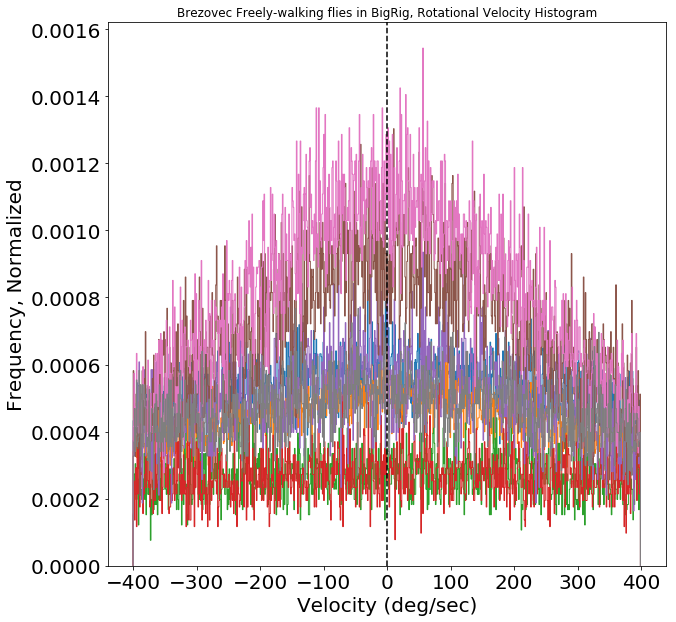

In [22]:
############
### Plot ###
############

fig = plt.figure(figsize=(10, 10))

types = ['vertical', 'horizontal', 'checker', 'dark', 'grey', 'bright']
bins = np.ndarray.tolist(np.arange(-400,400,1))
behavior = 'dRotLabY'

for i, type in enumerate(['dark']):
    for k, fly in enumerate(flies):
        if fly.x is not None and fly.y is not None:
            if fly.type == type:
                #vector = fly.av
                if len(fly.av) > 40000:
                    
                    vector = fly.av * 100
                    vector = vector * 50 # now in deg per sec
                    weights = np.ones_like(vector)/float(len(vector))
                    binned,throwaway,throwaway2=plt.hist(vector,bins,weights=weights,label=str(i),stacked=True, histtype = 'step')

plt.axvline(0,linestyle='--',color='k')
#plt.title('Visual Stimuli')
#plt.xlim(0,5)
#plt.ylim(0,.25)
plt.xlabel('Velocity (deg/sec)')
plt.ylabel('Frequency, Normalized')
plt.title('Brezovec Freely-walking flies in BigRig, Rotational Velocity Histogram',fontsize=12)
#plt.plot(0.32405,0.3207,'ko',markersize=10)

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, timestr)
#plt.savefig(fname,dpi=300,bbox_inches='tight')

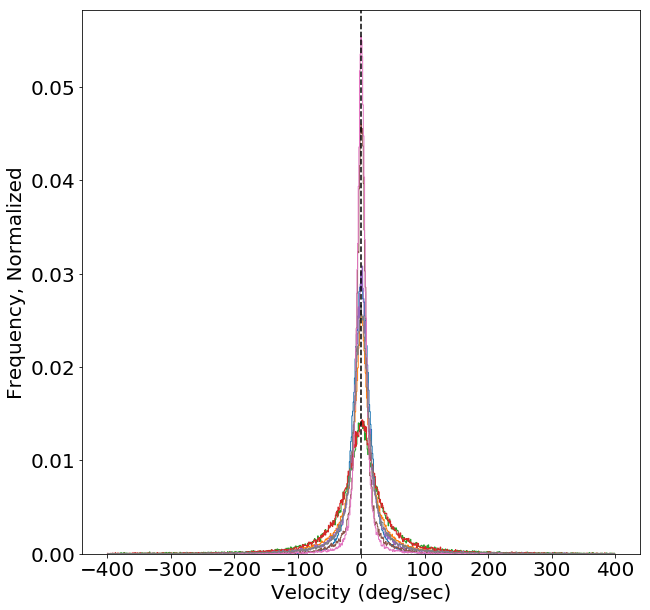

In [25]:
############
### Plot ###
############

fig = plt.figure(figsize=(10, 10))

types = ['vertical', 'horizontal', 'checker', 'dark', 'grey', 'bright']
bins = np.ndarray.tolist(np.arange(-400,400,1))
behavior = 'dRotLabY'

for i, type in enumerate(['dark']):
    for k, fly in enumerate(flies):
        if fly.x is not None and fly.y is not None:
            if fly.type == type:
                #vector = fly.av
                if len(fly.av) > 40000:
                    
                    vector = fly.av * 100 # now in deg per sec
                    weights = np.ones_like(vector)/float(len(vector))
                    binned,throwaway,throwaway2=plt.hist(vector,bins,weights=weights,label=str(i),stacked=True, histtype = 'step')

plt.axvline(0,linestyle='--',color='k')
#plt.title('Visual Stimuli')
#plt.xlim(0,5)
#plt.ylim(0,.25)
plt.xlabel('Velocity (deg/sec)')
plt.ylabel('Frequency, Normalized')
#plt.title('Brezovec Freely-walking flies in BigRig, Rotational Velocity Histogram',fontsize=12)
#plt.plot(0.32405,0.3207,'ko',markersize=10)

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, timestr)
plt.savefig(fname,dpi=300,bbox_inches='tight')

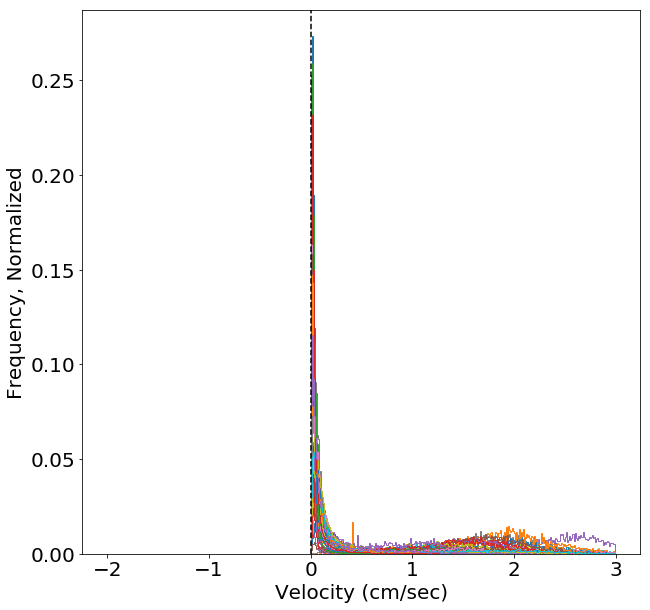

In [28]:
############
### Plot ###
############

fig = plt.figure(figsize=(10, 10))

types = ['vertical', 'horizontal', 'checker', 'dark', 'grey', 'bright']
bins = np.ndarray.tolist(np.arange(-2,3,.01))
behavior = 'dRotLabY'

for i, type in enumerate(['dark']):
    for k, fly in enumerate(flies):
        if fly.x is not None and fly.y is not None:
            if fly.type == type:
                #vector = fly.av


                vector = fly.v * 100 * 100 # now in cm/sec
                #vector = vector * 50 # now in deg per sec
                weights = np.ones_like(vector)/float(len(vector))
                binned,throwaway,throwaway2=plt.hist(vector,bins,weights=weights,label=str(i),stacked=True, histtype = 'step')

plt.axvline(0,linestyle='--',color='k')
#plt.title('Visual Stimuli')
#plt.xlim(0,5)
#plt.ylim(0,.25)
plt.xlabel('Velocity (cm/sec)')
plt.ylabel('Frequency, Normalized')
#plt.title('Brezovec Freely-walking flies in BigRig, All Velocity Histogram',fontsize=12)
#plt.plot(0.32405,0.3207,'ko',markersize=10)

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, timestr)
#plt.savefig(fname,dpi=300,bbox_inches='tight')

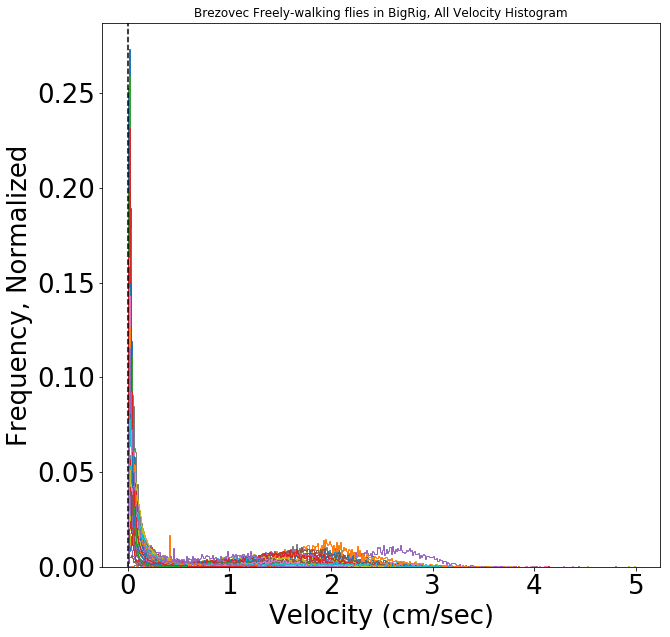

In [117]:
############
### Plot ###
############

fig = plt.figure(figsize=(10, 10))

types = ['vertical', 'horizontal', 'checker', 'dark', 'grey', 'bright']
bins = np.ndarray.tolist(np.arange(0,5,.01))
behavior = 'dRotLabY'

for i, type in enumerate(['dark']):
    for k, fly in enumerate(flies):
        if fly.x is not None and fly.y is not None:
            if fly.type == type:
                #vector = fly.av


                vector = fly.v * 100 * 100 # now in cm/sec
                #vector = vector * 50 # now in deg per sec
                weights = np.ones_like(vector)/float(len(vector))
                binned,throwaway,throwaway2=plt.hist(vector,bins,weights=weights,label=str(i),stacked=True, histtype = 'step')

plt.axvline(0,linestyle='--',color='k')
#plt.title('Visual Stimuli')
#plt.xlim(0,5)
#plt.ylim(0,.25)
plt.xlabel('Velocity (cm/sec)')
plt.ylabel('Frequency, Normalized')
plt.title('Brezovec Freely-walking flies in BigRig, All Velocity Histogram',fontsize=12)
#plt.plot(0.32405,0.3207,'ko',markersize=10)

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, timestr)
plt.savefig(fname,dpi=300,bbox_inches='tight')